### Reading:
1. Skim [this page](https://scikit-learn.org/stable/modules/clustering.html) to get an intuition for how clustering works. 
2. Study The first figure in Section 2.3.1 closely. Notice how different algorithms fit different datsets.

### Clustering with California Housing Dataset
- NOTE: Due to some randomness your results may differ slightly. Especially the color of the graphs. 

In [42]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [43]:
housing_dataset = fetch_california_housing() # get dataset

print(help(fetch_california_housing)) #NOTE: Housing prices are in units of 100,000. 

Help on function fetch_california_housing in module sklearn.datasets._california_housing:

fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
    Load the California housing dataset (regression).
    
    ==============   ==============
    Samples total             20640
    Dimensionality                8
    Features                   real
    Target           real 0.15 - 5.
    ==============   ==============
    
    Read more in the :ref:`User Guide <california_housing_dataset>`.
    
    Parameters
    ----------
    data_home : optional, default: None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    download_if_missing : optional, default=True
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.
    
    
    return_X_y : bool

In [44]:
# create dataframe
housing_df = pd.DataFrame(housing_dataset.data, columns=housing_dataset.feature_names)

In [45]:
# set target variable
housing_df['MedHouseVal'] = housing_dataset.target

In [46]:
# look at our df
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Inspect the dataset. 
1. Inspect the data and take time to get familiar with this dataset.
2. Describe the data(use built-in functions to describe the data). 
    - Min/max, median etc...
3. Make a few plots to get familiar with the data. 

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

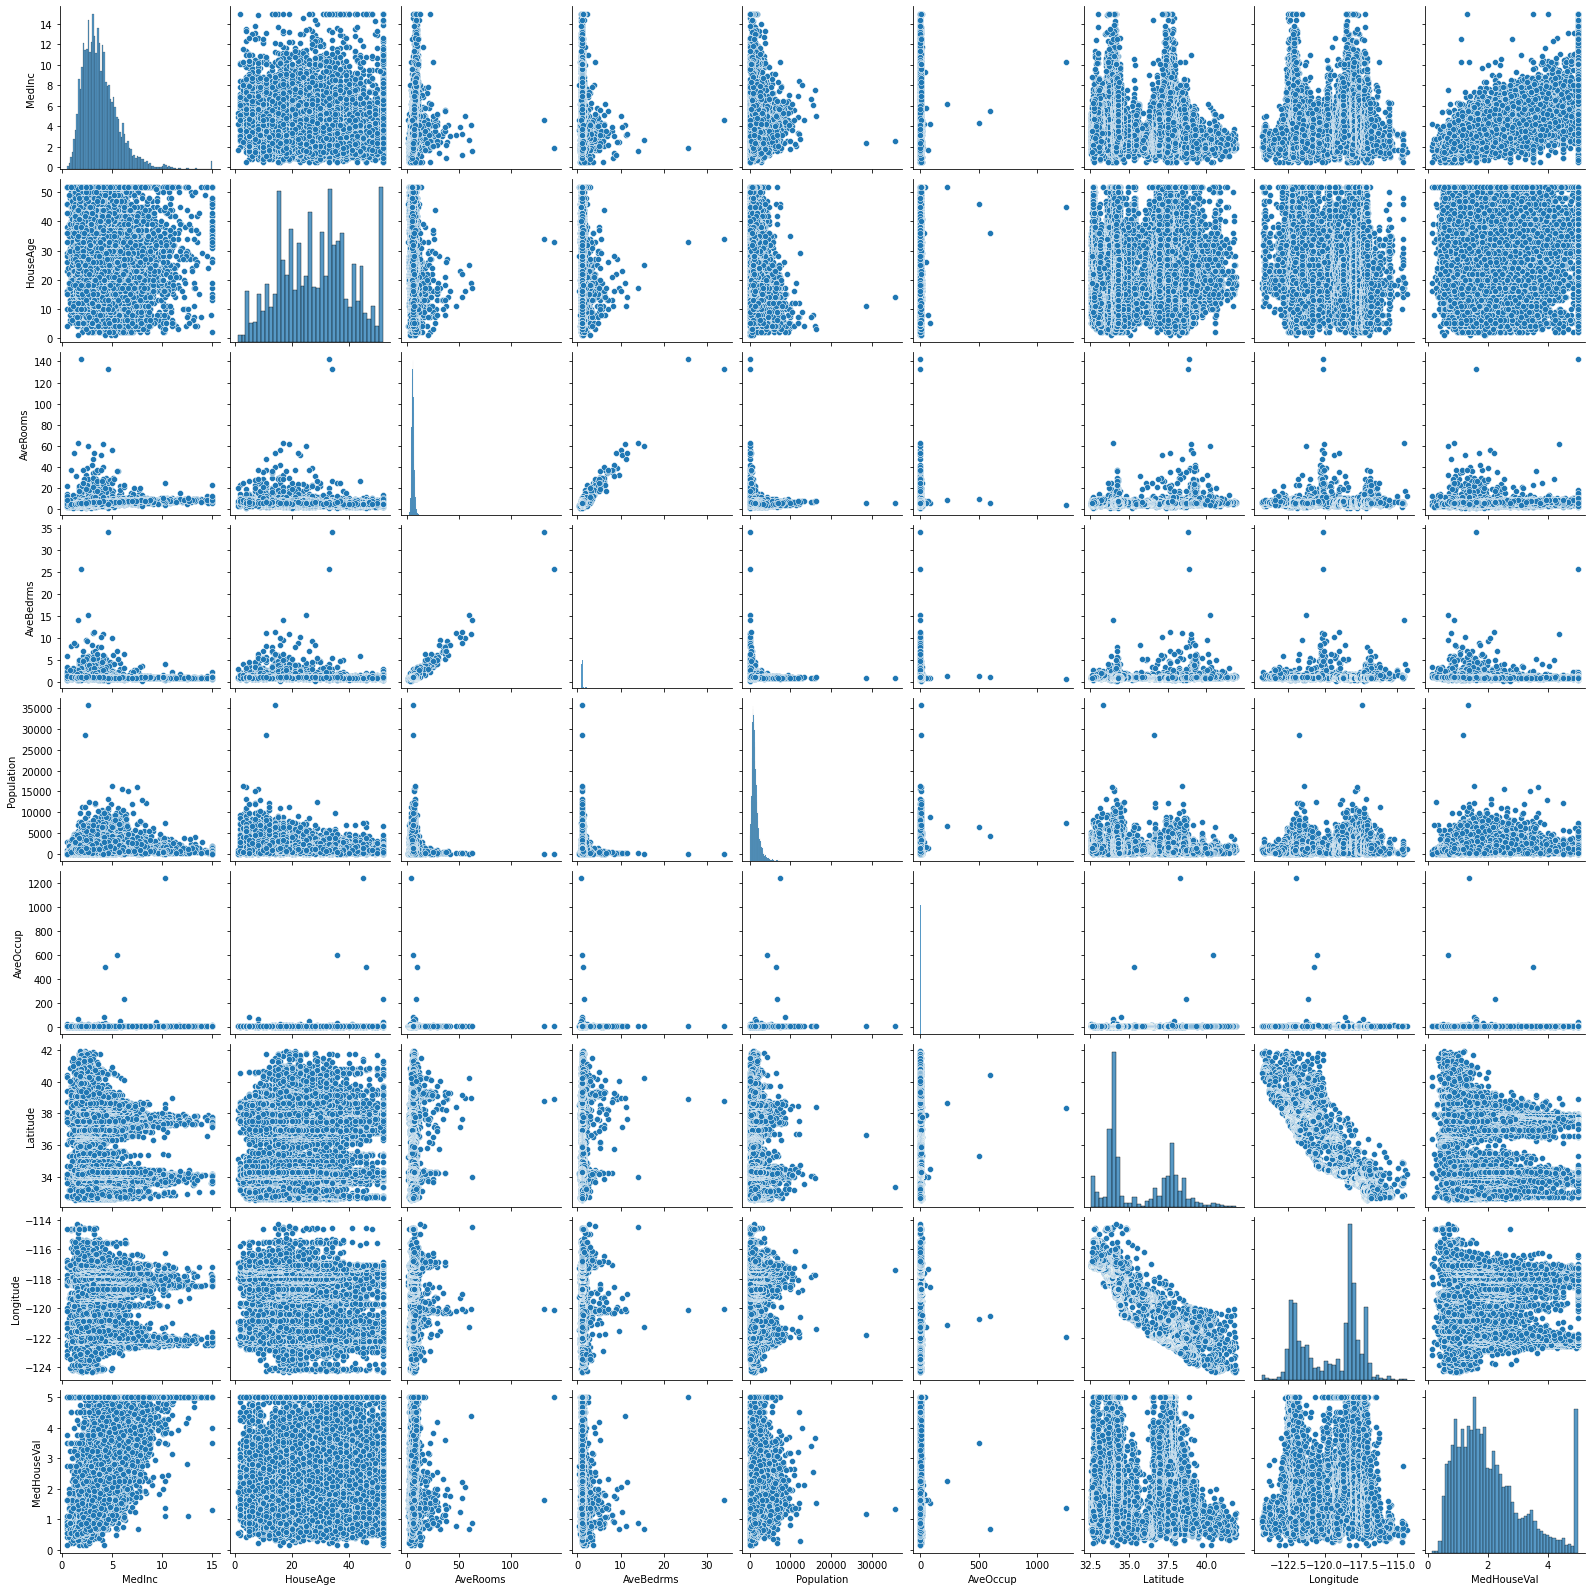

In [47]:
# Your code here

print(housing_df.describe())

# The highest number of average rooms is 141, which seems very high. 
# Same with average bedrooms (34) and average occupancy (1243).
# There are probably some outliers among the samples.

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(housing_df)
plt.show()


### Make a scatter plot 
- Use the lats and lons to make a scatter plot. 
- The resulting graph should look roughly like California. 

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

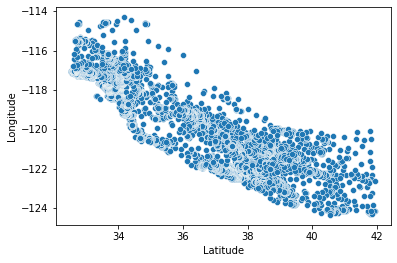

In [48]:
sns.scatterplot(data=housing_df, x="Latitude", y="Longitude")

### Cluster the data
1. Using only the lats and lons we will create clusters. 
2. Create a new `lat_lon_df` that has only lats and lons.
3. Using the `sklearn` library import the `KMeans` model. 
4. Create a `kmeans` variable with `KMeans` and set `n_clusters` = 2
5. Fit the `kmeans` model to the `lat_lon_df`
6. Call `.predict` on the model using `lat_lon_df` as our `X` value. **Note:** we are predicting on teh same thing we just clustered. 

In [50]:
lat_lon_df = housing_df[["Latitude", "Longitude"]]
lat_lon_df.head()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
lat_lon_model = kmeans.fit(lat_lon_df)
lat_lon_model.predict(lat_lon_df)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

### See the Centroids

Since the k value was set to 2, we will have two centroids which can be viewed using the `.cluster_centers_` attribute.

1. print the centroid values
2. print the labels using `kmeans.labels_`
3. createa  variable called `clust2` that holds `kmeans.labels_`.
3. Create a set on the labels to view all unique labels. 

In [53]:
print(lat_lon_model.cluster_centers_)

print(lat_lon_model.labels_)

clust2 = lat_lon_model.labels_

set(lat_lon_model.labels_)

[[  33.93890434 -118.00607388]
 [  37.95437601 -121.71480005]]
[1 1 1 ... 1 1 1]


numpy.ndarray

### Plot the clustered dataset
1. Add a column called `clust2` to the `lat_lon_df`.
2. Set the `reg2` column to `reg2` variable. 
3. You may get a warning but it's ok. 
4. Display the `lat_lon_df`. You should have 3 columns. Lat/Lon/reg2. 
5. Create a scatterplot of the 2 clustered regions. 
6. Optional: See if you can get the warning to go away. 
7. Optional: Change the value of `n_clusters` and rerun the notebook. Be sure to change it back to 2!

In [52]:
lat_lon_df["reg2"] = clust2

<ipython-input-52-b824f3cc9f51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_lon_df["reg2"] = clust2


In [54]:
lat_lon_df.head()

,Latitude,Longitude,reg2
0,37.88,-122.23,1
1,37.86,-122.22,1
2,37.85,-122.24,1
3,37.85,-122.25,1
4,37.85,-122.25,1


<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

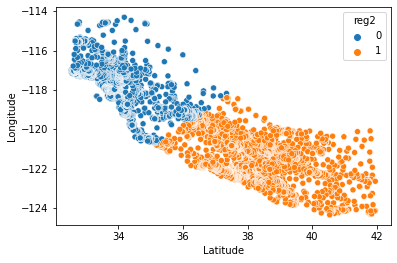

In [55]:
sns.scatterplot(data=lat_lon_df, x="Latitude", y="Longitude", hue="reg2")

### Split original df based on our clustering
1. Set column `reg2` in `housing_df` equal to `lat_lon_df['reg2']
2. Display the dataframe. 
3. Create a new df called `so_cal_df` that only has the blocks in southern California (reg2 with a value of 1). 
3. Create a new df called `no_cal_df` that only has the blocks in norther California (reg2 with a value of 0).
4. Plot the lats and lons of `so_cal_df` and `no_cal_df`.

In [56]:
housing_df["reg2"] = lat_lon_df["reg2"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,reg2
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1


<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

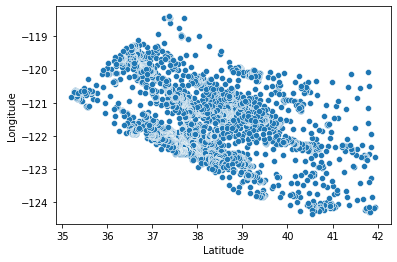

In [57]:
so_cal_df = housing_df[housing_df.reg2 == 1]
no_cal_df = housing_df[housing_df.reg2 == 0]

sns.scatterplot(data=so_cal_df, x="Latitude", y="Longitude")

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

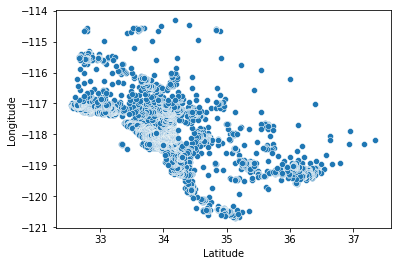

In [58]:
sns.scatterplot(data=no_cal_df, x="Latitude", y="Longitude")

### Calculate the median house values
1. Calculate for `no_cal_df` and `so_cal_df`.

In [63]:
print(no_cal_df["MedHouseVal"].median())
print(so_cal_df["MedHouseVal"].median())

1.858
1.655


### Since `so_cal_df` has a higher median house value let's work with it. 
1. Create a new cluster model on the `so_cal_df` using only `MedHouseVal` and a cluster size of 3. 
2. Plot `so_cal_df` with the 3 clusters based on `MedHouseVal`.
3. Calculate the median `MedHouseVal` for each cluster. 

<ipython-input-69-3a77aca5b0f6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_cal_df["hi_med_lo"] = reg3


<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

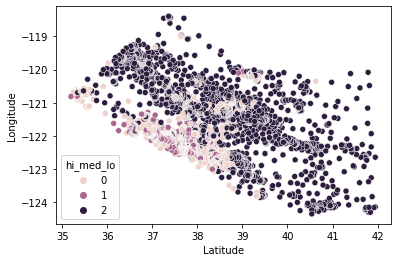

In [69]:
X = np.array(so_cal_df["MedHouseVal"]).reshape(-1, 1)

kmeans = KMeans(n_clusters=3)
so_cal_model = kmeans.fit(X)
so_cal_model.predict(X)

reg3 = so_cal_model.labels_
so_cal_df["hi_med_lo"] = reg3

sns.scatterplot(data = so_cal_df, x="Latitude", y="Longitude", hue="hi_med_lo")


In [71]:
print(f"Clust 0 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==0].median()}")
print(f"Clust 1 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==1].median()}")
print(f"Clust 2 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==2].median()}")

Clust 0 median house value: 2.353
Clust 1 median house value: 4.043
Clust 2 median house value: 1.042


### Create Clusters from the full dataset
1. Using the original dataset (without any of our cluster columns) create a KMeans model. 
2. Plot the resulting clusters. 
3. Change the number of clusters and rerun the notebook. 
4. Note: I don't see any obvious pattern in these clusters. Do you? 

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

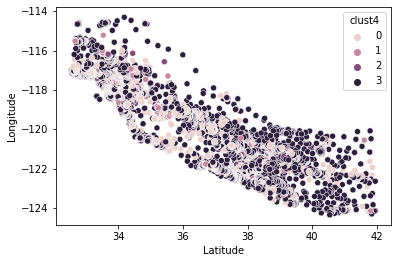

In [74]:
X = housing_df

housing_model = KMeans(n_clusters = 4)
housing_model = housing_model.fit(X)
housing_model.predict(X)

clust4 = housing_model.labels_
housing_df["clust4"] = clust4

sns.scatterplot(data=housing_df, x="Latitude", y="Longitude", hue="clust4")

## Optional:
1. Explore other clustering algorithms. 
2. Cluster based on other features and plot them. 
